In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(train_imgs,train_lables),(test_imgs,test_lables)=tf.keras.datasets.mnist.load_data()

In [2]:
print("Train Image Shape : " , train_imgs.shape)
print("Train Lable Shape : " ,train_lables.shape)
print("Test Image Shape : " ,test_imgs.shape)
print("Test Lable Shape : " ,test_lables.shape)

Train Image Shape :  (60000, 28, 28)
Train Lable Shape :  (60000,)
Test Image Shape :  (10000, 28, 28)
Test Lable Shape :  (10000,)


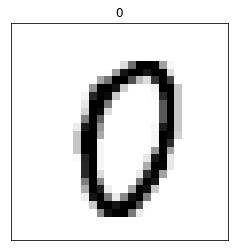

In [3]:
img = 1000
plt.figure()
plt.imshow(train_imgs[img],cmap = plt.cm.gray_r)
plt.title(train_lables[img])
plt.xticks([])
plt.yticks([])
plt.show()

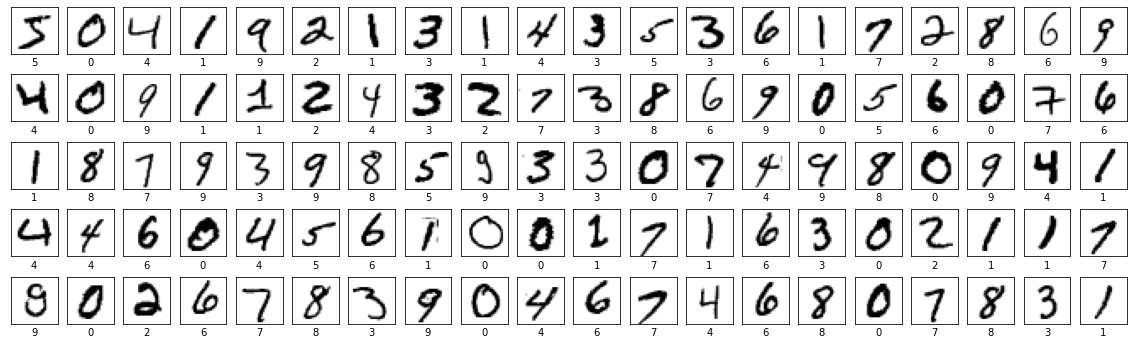

In [4]:
img = 0
row_img = 5
column_img = 20
plt.figure(figsize=(20,6))
for r in range(row_img):
    for c in range(column_img):
        plt.subplot(row_img,column_img,img+1)
        plt.imshow(train_imgs[img],cmap = 'gray_r')
        plt.xlabel(train_lables[img])
        plt.xticks([])
        plt.yticks([])
        img += 1

In [5]:
train_imgs_reshaped = train_imgs.reshape(-1,784).astype('float32')/255
print("Train Image Shape : " , train_imgs.shape)
print("Train Image Re-Shaped : " ,train_imgs_reshaped.shape)

Train Image Shape :  (60000, 28, 28)
Train Image Re-Shaped :  (60000, 784)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=784),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)
h = model.fit(x=train_imgs_reshaped,y=train_lables,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 6ms/step - loss: 0.2692 - accuracy: 0.9205 - val_loss: 0.1328 - val_accuracy: 0.9609
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1146 - accuracy: 0.9656 - val_loss: 0.1126 - val_accuracy: 0.9668
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0776 - accuracy: 0.9763 - val_loss: 0.1034 - val_accuracy: 0.9691
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0957 - val_accuracy: 0.9717
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0917 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0369 - accuracy: 0.9875 - val_loss: 0.1019 - val_accuracy: 0.9709
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.1027 - val_accuracy

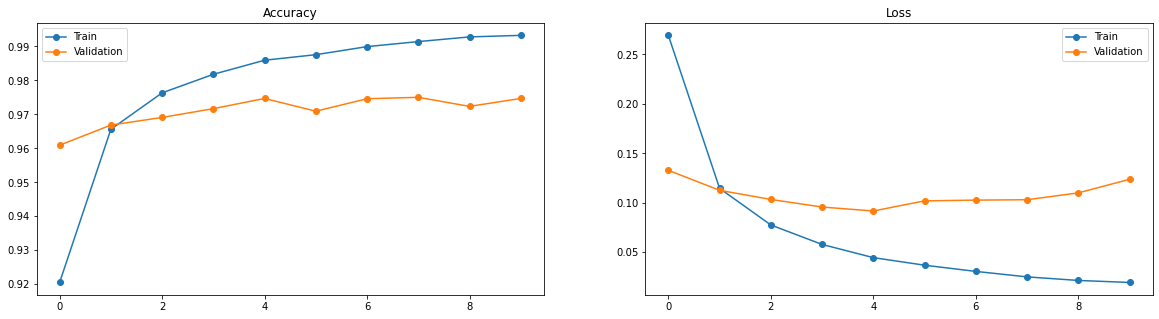

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')
plt.legend(['Train', 'Validation'])
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '-o')
plt.plot(h.history['val_loss'], '-o')
plt.legend(['Train', 'Validation'])
plt.title("Loss")
plt.show()
